## Food Access in the City of Washington D.C. ##
Group Members: Emily Biro, Christopher Do, & Rachel Seiberg (Notebook By: Brittney Lu)

**Research Question(s)**: Our group's primary research question is; what is the overall food landscape for the City of Washington D.C.? In our midterm project, our various notebooks will look at the current conditions of food resources, and the relationship specifically between grocery store locations and other demographic indicators as one way to analyze our primary research question. In this notebook, we will look specifically at the sub-question; what are the existing conditions for Washington D.C.'s food environment? We will use the following datasets as different types of food resource indicators across D.C.

**Data Sources**

* Farmer's Markets in DC, 2022: [Open Data DC](https://opendata.dc.gov/datasets/DCGIS::farmers-market-locations/explore?location=38.897045%2C-77.005912%2C12.69)
* Grocery Store Locations in DC, 2022: [Open Data DC](https://opendata.dc.gov/datasets/DCGIS::grocery-store-locations/explore?location=38.894944%2C-77.015000%2C11.90)
* Liquor Licensee Locations in DC, 2023: [Open Data DC](https://opendata.dc.gov/datasets/DCGIS::liquor-licenses/explore?location=38.902497%2C-77.008884%2C12.43)

Our indicators of "good" resources will be represented by the farmer's markets and groceries, whereas our indicators of "bad" resources will be represented by liquor retailers. Our goal for this section is to create a series of charts and maps to help visualize our counts and distributions.

**Data Exploration**: I'll begin by importing libraries, data files, and cleaning datasets for easier management during analysis. 

In [204]:
# import libraries
import pandas as pd # data exploration
import geopandas as gpd # spatial data
import plotly.express as px # plots
import matplotlib.pyplot as plt # plots
import contextily as ctx # basemaps
import folium # basemaps

In [205]:
# import datasets and establish variables
farmers = pd.read_csv('midterm data_bl/farmers_markets_2022.csv')
grocery = pd.read_csv('midterm data_bl/grocery_stores_2022.csv')
liquor = pd.read_csv('midterm data_bl/liquor_licenses_2023.csv')

**Data Exploration (Grocery Stores)**: Now that my food environment libraries and datasets are imported, I want to clean and explore the grocery store locations dataset first. Our group midterm will take a deep-dive into how grocery store distribution relates to other demographic characteristics, such as race/ethnicity and income, but I'll start by creating some baseline visuals to understand where grocery stores are located across DC.

In [206]:
# count columns and rows
grocery.shape

(82, 36)

In [207]:
# datatypes
grocery.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 82 non-null     float64
 1   Y                 82 non-null     float64
 2   STORENAME         82 non-null     object 
 3   ADDRESS           82 non-null     object 
 4   ZIPCODE           82 non-null     int64  
 5   PHONE             82 non-null     int64  
 6   WARD              82 non-null     object 
 7   SSL               82 non-null     object 
 8   NOTES             53 non-null     object 
 9   PRESENT90         55 non-null     object 
 10  PRESENT95         55 non-null     object 
 11  PRESENT00         55 non-null     object 
 12  PRESENT05         55 non-null     object 
 13  PRESENT08         55 non-null     object 
 14  PRESENT09         55 non-null     object 
 15  PRESENT10         55 non-null     object 
 16  PRESENT11         55 non-null     object 
 17 

As-is, the grocery store locations dataset includes 82 rows of data and 36 column categories. Using the [Open Data DC dictionary for grocery store locations](https://opendata.dc.gov/datasets/DCGIS::grocery-store-locations/about), I can tell that this dataset includes descriptive information on which grocery retailers are present, spatial information on where groceries are located by zip code and ward, and temporal information on which grocery retailers were present during given years. I'll now clean the dataset by dropping empty columns and identifying columns to keep to create a trimmed subset.

In [208]:
# identify empty columns
grocery.columns[grocery.isna().all()].tolist()

['SE_ANNO_CAD_DATA']

In [209]:
# drop empty columns and check data
grocery = grocery.dropna(axis=1, how="all")
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          82 non-null     float64
 1   Y          82 non-null     float64
 2   STORENAME  82 non-null     object 
 3   ADDRESS    82 non-null     object 
 4   ZIPCODE    82 non-null     int64  
 5   PHONE      82 non-null     int64  
 6   WARD       82 non-null     object 
 7   SSL        82 non-null     object 
 8   NOTES      53 non-null     object 
 9   PRESENT90  55 non-null     object 
 10  PRESENT95  55 non-null     object 
 11  PRESENT00  55 non-null     object 
 12  PRESENT05  55 non-null     object 
 13  PRESENT08  55 non-null     object 
 14  PRESENT09  55 non-null     object 
 15  PRESENT10  55 non-null     object 
 16  PRESENT11  55 non-null     object 
 17  PRESENT12  55 non-null     object 
 18  PRESENT13  55 non-null     object 
 19  PRESENT14  55 non-null     object 
 20  PRESENT15  5

In [210]:
# columns to keep based on data dictionary
columns_to_keep = ['X','Y','STORENAME','ZIPCODE','WARD','XCOORD','YCOORD']
# check data
grocery[columns_to_keep].sample(5)

X          Y                 STORENAME  ZIPCODE    WARD  \
6  -77.002144  38.957977       Walmart Supercenter    20011  Ward 4   
74 -77.045200  38.914285           Dawson's Market    20009  Ward 2   
16 -76.990397  38.936824              Yes! Organic    20017  Ward 5   
20 -77.072999  38.934351                     Giant    20016  Ward 3   
58 -77.051144  38.896534  Market at Columbia Plaza    20037  Ward 2   

       XCOORD     YCOORD  
6   399814.33  143340.35  
74  396080.16  138491.14  
16  400832.73  140992.28  
20  393671.02  140720.27  
58  395563.58  136520.96

In [211]:
# new variable for cleaned data
grocery_clean = grocery[columns_to_keep].copy()
grocery_clean = grocery_clean.dropna()
grocery_clean.head(5)

X          Y                       STORENAME  ZIPCODE    WARD  \
0 -77.026981  38.984455                         Target     20012  Ward 4   
1 -77.026066  38.983464  International Progresso Market    20012  Ward 4   
2 -77.027798  38.967771               Jocelyn’s Market     20012  Ward 4   
3 -77.076459  38.965553                      Magruder's    20015  Ward 3   
4 -77.074910  38.964601                         Safeway    20015  Ward 3   

      XCOORD     YCOORD  
0  397662.57  146280.07  
1  397741.80  146169.97  
2  397591.16  144428.00  
3  393373.92  144184.19  
4  393508.13  144078.34

**Data Analysis (Grocery Stores)**: Now that I have a subset of my grocery store data, I want to generate two charts. One to show how many grocery stores there are by ward and one to show how many grocery stores there are by zip code.

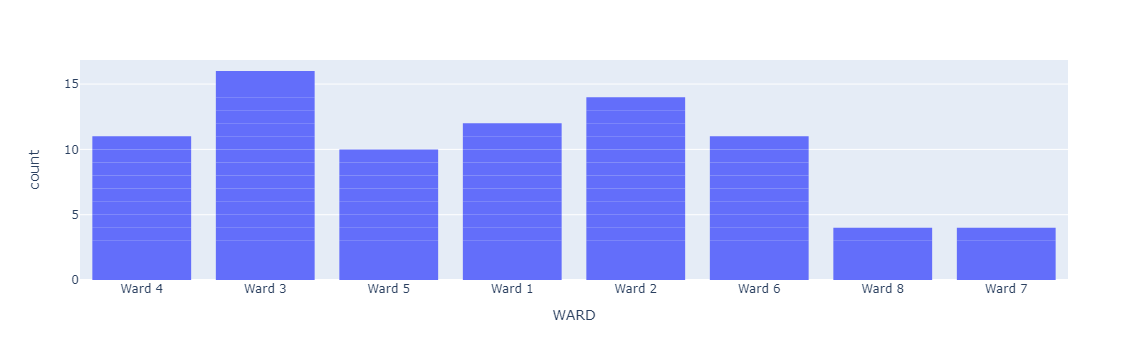

In [212]:
# simple bar chart: grocery store count by ward
fig = px.bar(grocery_clean,
             x='WARD',
            )
# remove white lines
fig.update_traces(marker_line_width=0)
# show figure
fig.show()

This is a start! To improve on this chart, I would like to re-order the ward numbers so they appear in ascending order (e.g. Ward 1 at the left going towards Ward 8 to the right). I would also like to re-name the axes label and add a title.

In [213]:
# create variable to sort by ward
grocery_ward = grocery_clean.sort_values(by='WARD', ascending=True)
grocery_ward.head(10)

X          Y       STORENAME  ZIPCODE    WARD     XCOORD  \
26 -77.040994  38.924215         Safeway    20009  Ward 1  396445.44   
21 -77.023796  38.931156   Panam Grocery    20010  Ward 1  397936.98   
25 -77.032986  38.929308          Target    20010  Ward 1  397140.04   
28 -77.043711  38.921804    Yes! Organic    20009  Ward 1  396209.70   
31 -77.032085  38.920762  Streets Market    20009  Ward 1  397217.80   
32 -77.043542  38.920756  Streets Market    20009  Ward 1  396224.29   
33 -77.024868  38.919757     Whole Foods    20001  Ward 1  397861.50   
34 -77.031620  38.918507    Yes! Organic    20009  Ward 1  397258.09   
72 -77.038442  38.921987   Harris Teeter    20009  Ward 1  396666.63   
22 -77.031924  38.930822           Giant    20010  Ward 1  397232.21   

       YCOORD  
26  139593.32  
21  140363.25  
25  140158.41  
28  139325.82  
31  139209.69  
32  139209.43  
33  139107.39  
34  138959.31  
72  139345.87  
22  140326.39

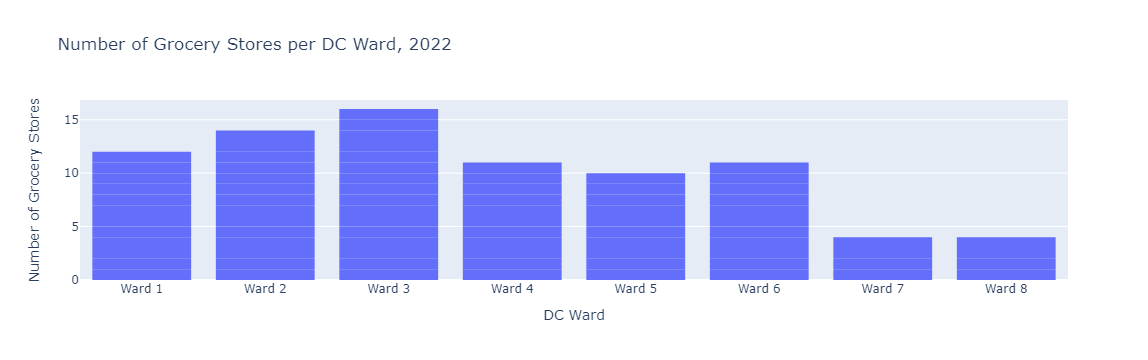

In [214]:
# update chart
fig = px.bar(grocery_ward,
             x='WARD',
             title='Number of Grocery Stores per DC Ward, 2022',
             labels={
                 'WARD':'DC Ward',
                 'count':'Number of Grocery Stores'
             }
            )
# remove white lines
fig.update_traces(marker_line_width=0)
# show figure
fig.show()

It looks like Ward 3 has the highest number of grocery stores, with Wards 7 and 8 having the lowest number of grocery stores. In doing some external research, I am understanding that [Ward 3](https://www.dchealthmatters.org/?module=demographicdata&controller=index&action=index&id=131490&sectionId=) is a Whiter, higher-income, and residentially / commercially denser area compared to [Wards 7 and 8](https://www.dchealthmatters.org/?module=demographicdata&controller=index&action=index&id=131495&sectionId=), which has predominantly Black residents, and lower-income households. The stark contrast in number of grocery stores and preliminary understanding of demographics by ward indicates to me that resource allocation in DC, including food resources, has been racialized and operationalized by wealth. Our group will also be generating maps to see if this is a visual trend. In the meantime, I want to create another chart that will help show the number of grocery stores by zip code. To do this, I want to clean the data again, this time centering zip code.

In [215]:
# output original data
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          82 non-null     float64
 1   Y          82 non-null     float64
 2   STORENAME  82 non-null     object 
 3   ADDRESS    82 non-null     object 
 4   ZIPCODE    82 non-null     int64  
 5   PHONE      82 non-null     int64  
 6   WARD       82 non-null     object 
 7   SSL        82 non-null     object 
 8   NOTES      53 non-null     object 
 9   PRESENT90  55 non-null     object 
 10  PRESENT95  55 non-null     object 
 11  PRESENT00  55 non-null     object 
 12  PRESENT05  55 non-null     object 
 13  PRESENT08  55 non-null     object 
 14  PRESENT09  55 non-null     object 
 15  PRESENT10  55 non-null     object 
 16  PRESENT11  55 non-null     object 
 17  PRESENT12  55 non-null     object 
 18  PRESENT13  55 non-null     object 
 19  PRESENT14  55 non-null     object 
 20  PRESENT15  5

In [216]:
# zip code is in 'int' so convert it to 'str'
grocery_zip = pd.read_csv(
    'midterm data_bl/grocery_stores_2022.csv',
    dtype=
    {
        'ZIPCODE':str
    }
)

In [217]:
# add a count column per zip code
# identify the unique zip code values
grocery_zip.ZIPCODE.unique().tolist()

['20012',
 '20015',
 '20011',
 '20016',
 '20008',
 '20017',
 '20010',
 '20018',
 '20009',
 '20002',
 '20007',
 '20001',
 '20005',
 '20037',
 '20003',
 '20024',
 '20020',
 '20032',
 '20019']

In [218]:
# establish counts per zip code
grocery_zip=grocery_zip.value_counts('ZIPCODE').reset_index(name='count')
grocery_zip

ZIPCODE  count
0    20002     10
1    20009      9
2    20016      7
3    20011      7
4    20003      6
5    20001      5
6    20010      5
7    20037      5
8    20007      5
9    20008      4
10   20012      4
11   20018      3
12   20020      3
13   20015      2
14   20005      2
15   20032      2
16   20017      1
17   20019      1
18   20024      1

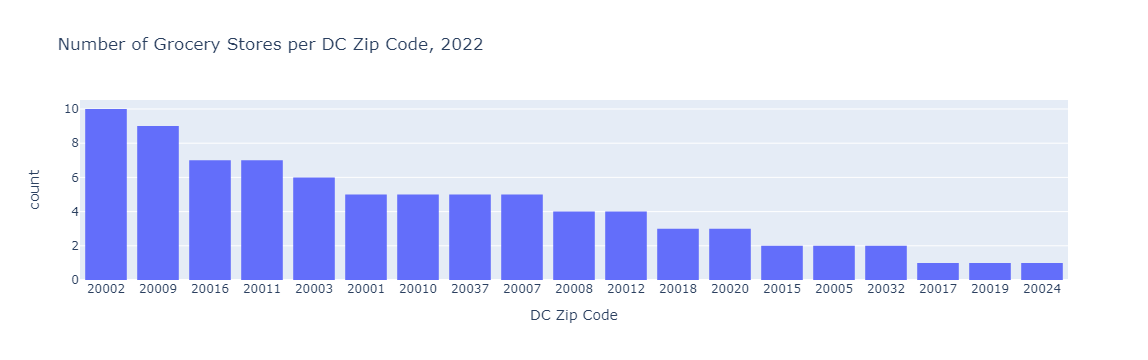

In [219]:
# create a chart
fig = px.bar(grocery_zip.head(82),
             x='ZIPCODE',
             y='count',
             title='Number of Grocery Stores per DC Zip Code, 2022',
             labels={
                 'ZIPCODE': 'DC Zip Code'
             }
            )
# remove white lines
fig.update_traces(marker_line_width=0)
# show figure
fig.show()

It looks like zip code 20002 has the highest number of grocery stores, with zip code 20024 having the lowest number of grocery stores. In doing some external research, I am understanding that both the [20002 zip code](https://www.dchealthmatters.org/demographicdata?id=9402) and the [20024 zip code](https://www.dchealthmatters.org/?module=demographicdata&controller=index&action=index&id=9422&sectionId=) have a pretty evenly split composition of Black and White residents, but that White residents have approximately double the median household income compared to Black residents across both zip codes. The one main difference is that there is a significantly higher total population count for 20002 (70,788 people in 2022) compared against 20024 (13,138 people in 2022). This indicates to me that while food resource allocation should be relatively proportional to the number of people living in that area, using different types of data at multiple spatial scales can give a more nuanced understanding of where need is may be highest or which residents will need greater access.

**Data Exploration (Farmers Markets)**: To supplement our "good" food resources data charts, I want to create some visuals for our farmers markets dataset. 

In [220]:
# count columns and rows
farmers.shape

(62, 33)

In [221]:
# datatypes
farmers.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 62 non-null     float64
 1   Y                 62 non-null     float64
 2   NAME              62 non-null     object 
 3   LAYER             62 non-null     object 
 4   THEME             62 non-null     object 
 5   IMAGE_            10 non-null     object 
 6   ADDRESS           62 non-null     object 
 7   PHONE             19 non-null     object 
 8   VOUCHERS          53 non-null     object 
 9   PRIORITY_LEVEL    12 non-null     float64
 10  DESCRIPTION       22 non-null     object 
 11  EMAIL_PHONE       62 non-null     object 
 12  DAY               62 non-null     object 
 13  SEASONOPEN        61 non-null     object 
 14  SEASONCLOSE       51 non-null     object 
 15  WEB_URL           54 non-null     object 
 16  WEB_URL2          5 non-null      object 
 17 

As-is, the farmers markets locations dataset includes 62 rows of data and 33 column categories. Using the [Open Data DC dictionary for farmers markets](https://opendata.dc.gov/datasets/DCGIS::farmers-market-locations/about), I can tell that this dataset includes descriptive information on which farmers markets are available and what time of year they operate, spatial information on where farmers markets are located by address (no ward or zip code, though), and programming information on what type of vouchers are accepted per farmers market, if available. I'll now clean the dataset by creating a trimmed dataset. I think it would be interesting to see the counts what voucher programs are available, given the perceived higher costs of farmers markets.

In [222]:
# identify columns to keep based on data dictionary
columns_to_keep2 = ['NAME','VOUCHERS']
# new variable for cleaned data
farmers_clean=farmers[columns_to_keep2].copy()
farmers_clean=farmers_clean.dropna()
# check data
farmers_clean.head(5)

NAME  \
1                     14th & Kennedy Farmers' Market   
2  New Morning Farmers Market at the Sheridan School   
3                                 UDC Farmers Market   
4                          Petworth Community Market   
6                          Brookland Farmers' Market   

                                            VOUCHERS  
1  Accepts SNAP, WIC and senior farmers market nu...  
2  Accepts WIC, senior farmers market nutrition p...  
3  Accepts SNAP, WIC and senior farmers market nu...  
4  Accepts SNAP, WIC and senior farmers market nu...  
6  Accepts SNAP, WIC and EBT; distributes Produce...

In [223]:
# add count column by voucher
# identify unique voucher values
farmers_clean.VOUCHERS.unique().tolist()

['Accepts SNAP, WIC and senior farmers market nutrition program benefits.',
 'Accepts WIC, senior farmers market nutrition program and Produce Plus benefits.',
 'Accepts SNAP, WIC and senior farmers market nutrition program benefits; distributes Produce Plus checks.',
 'Accepts SNAP, WIC and senior farmers market nutrition program benefits; Matching dollars for SNAP and WIC customers; distributes Produce Plus checks.',
 'Accepts SNAP, WIC and EBT; distributes Produce Plus checks.',
 'Accepts SNAP, WIC and senior farmers market nutrition program benefits; doubles SNAP, WIC, and senior farmers market nutrition program checks; distributes Produce Plus checks.',
 'Accepts WIC and senior farmers market nutrition program benefits; distributes Produce Plus checks.',
 'Accepts SNAP, WIC and senior farmers market nutrition program benefits; $10 matching prgram for nutrition assistance customers; distributes Produce Plus checks.',
 'Accepts WIC and senior farmers market nutrition program benefit

In [224]:
farmers_clean=farmers_clean.value_counts('VOUCHERS').reset_index(name='count')
farmers_clean

VOUCHERS  count
0   Accepts SNAP, WIC and senior farmers market nu...     12
1   Accepts SNAP, WIC and senior farmers market nu...      7
2   Accepts SNAP, WIC and senior farmers market nu...      4
3   Accepts SNAP, WIC and senior farmers market nu...      2
4   Accepts SNAP, WIC and EBT; distributes Produce...      2
5   Accepts WIC and senior farmers market nutritio...      2
6   Accepts SNAP, WIC, senior farmers market nutri...      2
7   Accepts SNAP, WIC, and senior farmers market n...      2
8   Accepts SNAP, WIC, senior farmers market nutri...      1
9   Distributes Produce Plus checks; some vendors ...      1
10                   Distributes Produce Plus checks.      1
11  Accepts WIC, senior farmers market nutrition p...      1
12                              Accepts WIC benefits.      1
13  Accepts WIC and senior farmers market nutritio...      1
14  Accepts SNAP, WIC, senior farmers market nutri...      1
15  Accepts SNAP, WIC, senior farmers market nutri...      1
16                                                         1
17  Accepts SNAP, WIC, senior farmers market nutri...      1
18  Accepts SNAP and WIC benefits; distributes Pro...      1
19  Accepts SNAP, WIC and senior farmers market nu...      1
20  Accepts SNAP, WIC and senior farmers market nu...      1
21  Accepts SNAP, WIC and senior farmers market nu...      1
22  Accepts SNAP, WIC and senior farmers market nu...      1
23  Accepts SNAP, WIC and senior farmers market nu...      1
24  Accepts SNAP, WIC and senior farmers market nu...      1
25                             Accepts SNAP benefits.      1
26  Accepts SNAP and Washington/Maryland WIC and s...      1
27  Some vendors accept SNAP, WIC and senior farme...      1

**Data Analysis (Farmers Markets)**: Now that I have a subset of my data, I want to create a chart to see what are the most common types of voucher programs accepted, and how many of the 62 farmers markets offer this subsidy-based programming.

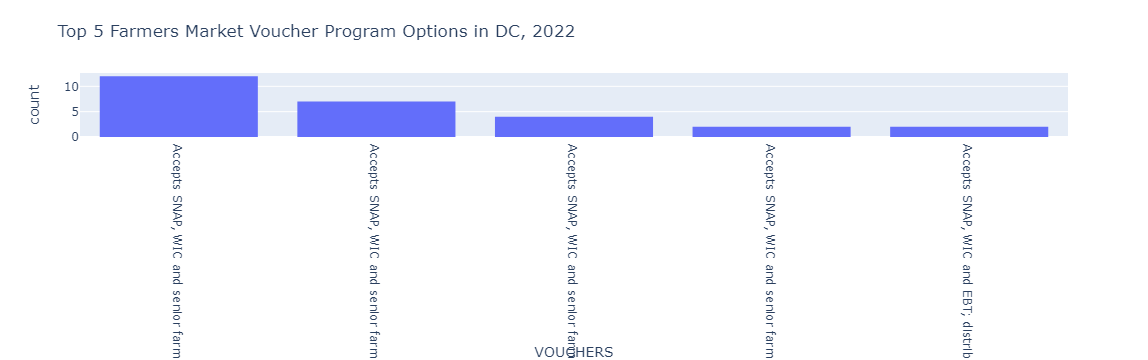

In [225]:
# create chart showing most common voucher programs
fig = px.bar(farmers_clean.head(5),
             x='VOUCHERS',
             y='count',
             title='Top 5 Farmers Market Voucher Program Options in DC, 2022',
             labels={
                 'VOUCHER':'Voucher Program'}
            )
# remove white lines
fig.update_traces(marker_line_width=0)
# show figure
fig.show()

The chart above is a visually messy but does tell me some good information. In 2022, the top 5 most common voucher programming options were:
1. Accepts SNAP, WIC, senior farmers market nutrition programs, voucher matching, and produce plus checks
2. Accepts SNAP, WIC, senior farmers market nutrition programs, and $15 matching dollars
3. Accepts SNAP, WIC, and senior farmers market nutrition programs
4. Accepts SNAP, WIC, senior farmers market nutrition programs, voucher matching, and produce plus checks
5. Accepts SNAP, WIC, EBT, and produce plus checks

The columns also overlap quite a bit, so the takeaway that I want to highlight for this dataset is: of the most common type of voucher programs, SNAP, WIC, and senior farmers market nutrition programs were the most frequently accessible.

*Quick Note: given the amount of time that we have for presenting, we will not be including this chart in our midterm presentation.*

**Data Exploration (Liquor Retailers)**: Now that I have a few visuals for "good" food resources, I want to chart "bad" food resources, as indicated by liquor retailers. 

In [226]:
# count columns and rows
liquor.shape

(2243, 41)

In [227]:
# datatypes
liquor.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  2243 non-null   float64
 1   Y                  2243 non-null   float64
 2   LICENSE            2243 non-null   object 
 3   APPLICANT          2243 non-null   object 
 4   TRADE_NAME         2243 non-null   object 
 5   CLASS              2243 non-null   object 
 6   ADDRESS            2243 non-null   object 
 7   ZIPCODE            2243 non-null   int64  
 8   WARD               2243 non-null   object 
 9   ANC                2243 non-null   object 
 10  SMD                2243 non-null   object 
 11  STATUS             2243 non-null   object 
 12  TYPE               2243 non-null   object 
 13  BREW_PUB           9 non-null      object 
 14  ENTERTAINMENT      727 non-null    object 
 15  SALES_CONSUMPTION  17 non-null     object 
 16  SIDEWALK_CAFE      521 n

As-is, the liquor retailers dataset includes 2243 rows of data and 41 column categories. Using the [Open Data DC dictionary for liquor retailer locations](https://opendata.dc.gov/datasets/DCGIS::liquor-licenses/about), I can tell that this dataset includes descriptive information on the different types of liquor retailers and spatial information on where liquor retailers are located by zip code and ward. I'll now clean the dataset by dropping empty columns and identifying columns to keep to create a trimmed subset.

In [228]:
# zip code is in 'int' so convert it to 'str'
liquor = pd.read_csv(
    'midterm data_bl/liquor_licenses_2023.csv',
    dtype=
    {
        'ZIPCODE':str
    }
)


In [229]:
# identify columns to keep based on data dictionary
columns_to_keep3 = ['X','Y','ZIPCODE','WARD','TYPE','XCOORD','YCOORD','LONGITUDE','LATITUDE']
# new variable for cleaned data
liquor_clean=liquor[columns_to_keep3].copy()
liquor_clean=liquor_clean.dropna()
# check data
liquor_clean.head(5)

X          Y ZIPCODE    WARD                   TYPE     XCOORD  \
0 -77.031549  38.897027   20045  Ward 2                   Club  397263.41   
1 -77.083582  38.957499   20015  Ward 3  Retail - Liquor Store  392755.85   
2 -77.026685  38.906238   20001  Ward 2  Retail - Liquor Store  397685.66   
3 -77.047696  38.896311   20037  Ward 2  Retail - Liquor Store  395862.69   
4 -77.036162  38.905004   20036  Ward 2                   Club  396863.57   

      YCOORD  LONGITUDE   LATITUDE  
0  136574.85 -77.031547  38.897019  
1  143290.69 -77.083579  38.957492  
2  137597.25 -77.026682  38.906231  
3  136495.99 -77.047693  38.896303  
4  137460.50 -77.036160  38.904996

In [230]:
# add count column by type
# identify unique type values
liquor_clean.TYPE.unique().tolist()

['Club',
 'Retail - Liquor Store',
 'Restaurant',
 'Tavern',
 'Hotel',
 'Nightclub',
 'Multipurpose',
 'Retail - Grocery',
 'Marine Vessel',
 'Retail-Full Service Grocery',
 'Wholesaler',
 'Arena',
 'Caterer',
 'Retail - Class B',
 'Manufacturer',
 'Internet',
 'Retail-Liquor Store',
 '25 Percent',
 'Beer and Wine',
 'Railroad',
 'Retail - Full Service Grocery',
 'Retail-Class B']

In [231]:
liquor_clean=liquor_clean.value_counts('TYPE').reset_index(name='count')
liquor_clean

TYPE  count
0                      Restaurant    886
1                          Tavern    437
2           Retail - Liquor Store    217
3                Retail - Grocery    117
4                           Hotel    107
5                         Caterer    102
6     Retail-Full Service Grocery     52
7                      Wholesaler     47
8                       Nightclub     44
9                        Internet     42
10                   Multipurpose     42
11               Retail - Class B     37
12            Retail-Liquor Store     24
13                     25 Percent     23
14                           Club     22
15                   Manufacturer     18
16                  Marine Vessel     11
17                  Beer and Wine      8
18                 Retail-Class B      3
19                          Arena      2
20  Retail - Full Service Grocery      1
21                       Railroad      1

**Data Analysis (Liquor Retailers)**: Now that I have a subset of my liquor retailers data, I want to generate two charts. One to show the top 5 types of places liquor is provided and sold in DC, and one to show how these types are distributed by ward.

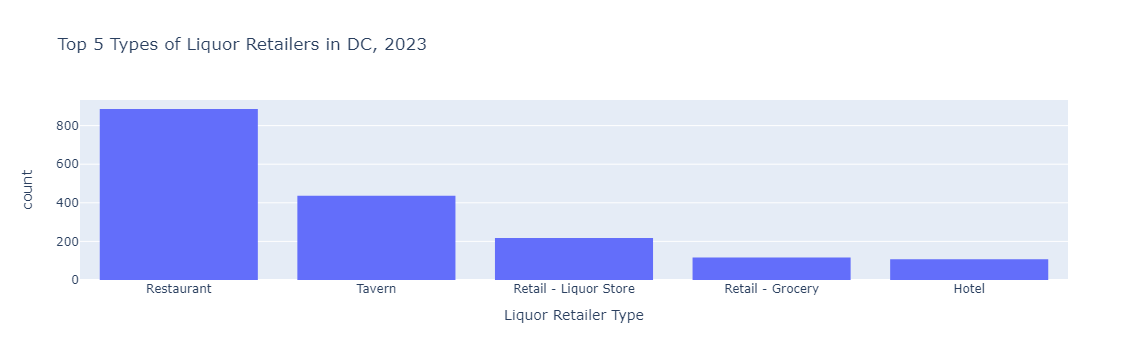

In [232]:
# create chart showing top 5 retailer types in DC
fig = px.bar(liquor_clean.head(5),
             x='TYPE',
             y='count',
             title='Top 5 Types of Liquor Retailers in DC, 2023',
             labels={
                 'TYPE':'Liquor Retailer Type'}
            )
# remove white lines
fig.update_traces(marker_line_width=0)
# show figure
fig.show()

The chart above shows that given all the different types of places liquor can be sold in DC, the top 5 retailer types include restaurants, taverns, liquor stores, grocery stores, and hotels. Now, I want to create a chart that will show how the top liquor retailers are distributed by ward.

In [234]:
# create a grouped variable
liquor_ward = liquor.value_counts(['WARD','TYPE']).reset_index(name='count')
liquor_ward

WARD           TYPE  count
0    Ward 2     Restaurant    397
1    Ward 6     Restaurant    139
2    Ward 1     Restaurant    124
3    Ward 2         Tavern    121
4    Ward 1         Tavern    121
..      ...            ...    ...
113  Ward 3     25 Percent      1
114  Ward 7       Internet      1
115  Ward 7        Caterer      1
116  Ward 7  Beer and Wine      1
117  Ward 1     25 Percent      1

[118 rows x 3 columns]

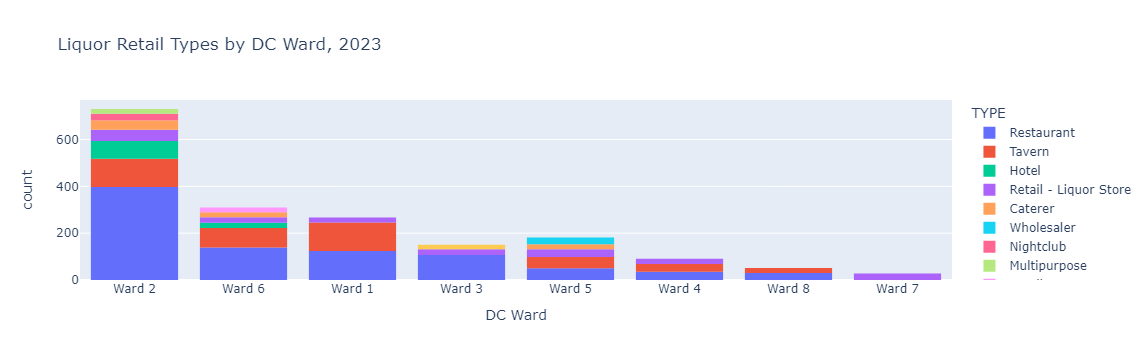

In [235]:
# create stacked chart
fig = px.bar(liquor_ward.head(30),
             x='WARD',
             y='count',
             color='TYPE',
             title='Liquor Retail Types by DC Ward, 2023',
             labels={
                 'WARD':'DC Ward'
             }
            )
# remove white lines
fig.update_traces(marker_line_width=0)
fig.show()

The chart above shows how different liquor retailer types are distributed per ward. From this chart, I can observe that Ward 2 has the most liquor retail providers, compared to Ward 7. However, Ward 2 also has the greatest concentration of restaurants as liquor providers, whereas Ward 7 has liquor stores only. This is an indicator that while there may be more liquor access in Ward 2, there are more diverse amenities compared against Ward 7, which has a disproportionate concentration of liquor stores compared against any other amenity type. When I compare this chart with the count of grocery stores by ward, I observe that Wards 2 and 3 both have higher access to liquor and groceries, but that their liquor access is primarily through the restaurant industry, whereas Wards 7 and 8 both have lower access to liquor and groceries, but that their liquor access is disproportionately represented through liquor stores.

**Data Mapping (Food Resources)**: I now want to see how "good" and "bad" food resources are spatially distributed across DC. My goal is to create basemaps for all the datasets listed above, such that:
* grocery stores = "good"
* farmers markets = "good"
* liquor retailers = "bad"

In [236]:
# map grocery stores
# import geojson file
grocery_location = gpd.read_file('midterm data_bl/grocery_stores_2022.geojson')

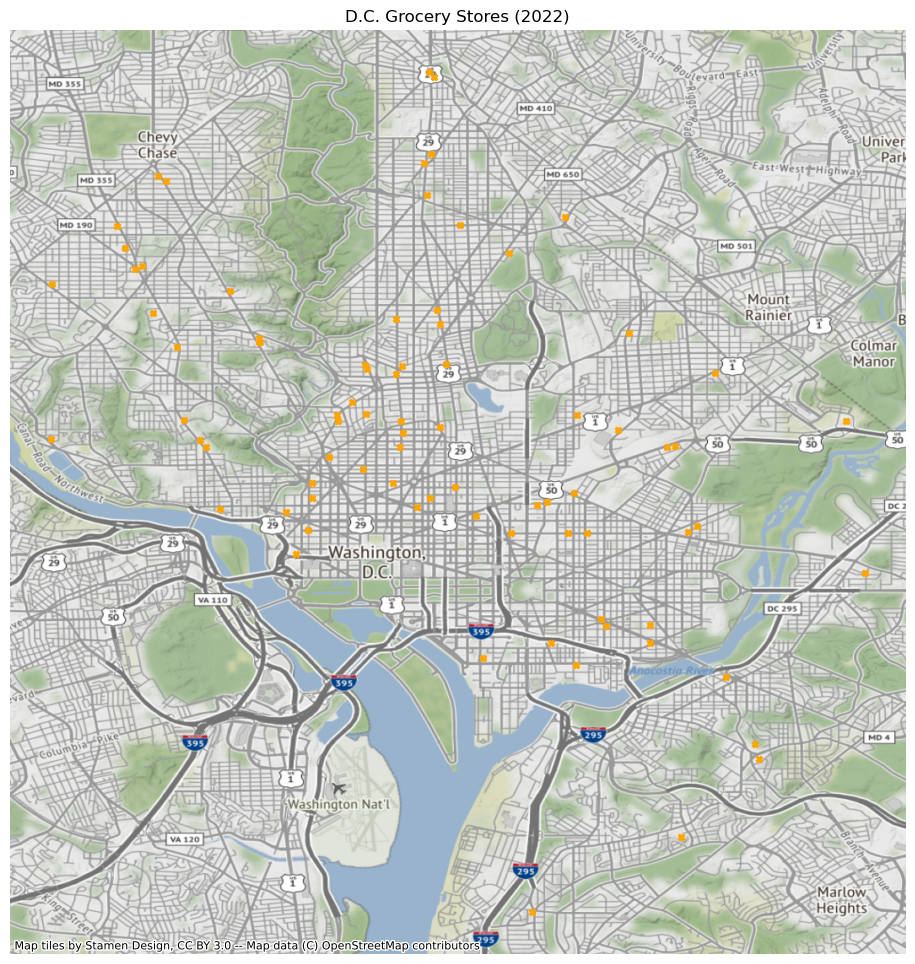

In [237]:
# start plot
fig, ax = plt.subplots (figsize=(12,12))
# details
grocery_location.plot(ax=ax,
                      marker='X',
                      markersize=20,
                      color='orange')
# turn off axes
ax.axis('off')
# title
ax.set_title('D.C. Grocery Stores (2022)')
# add basemap
ctx.add_basemap(ax, crs=4326)

In [238]:
# map farmers markets
# import geojson file
liquor_location=gpd.read_file('midterm data_bl/farmers_markets_2022.geojson')

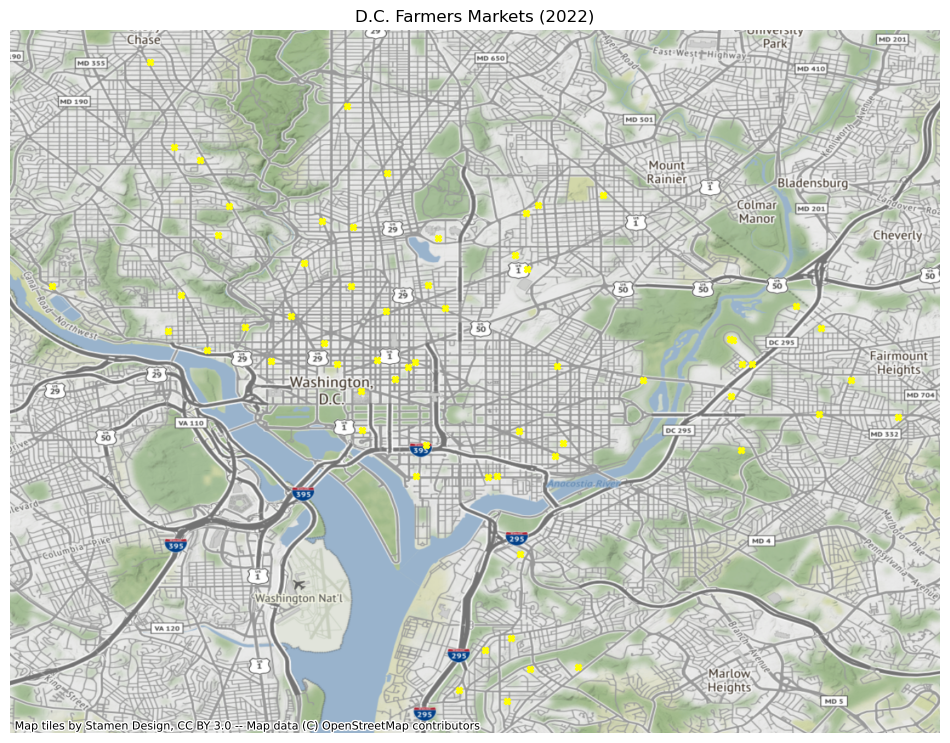

In [239]:
# start plot
fig, ax = plt.subplots(figsize=(12,12))
# details
liquor_location.plot(ax=ax,
                     marker='X',
                     markersize=20,
                     color='yellow')
# turn off axes
ax.axis('off')
# title
ax.set_title('D.C. Farmers Markets (2022)')
# add basemap
ctx.add_basemap(ax, crs=4326)

In [240]:
# map liquor retailers
# import geojson file
liquor_location=gpd.read_file('midterm data_bl/liquor_licenses_2023.geojson')

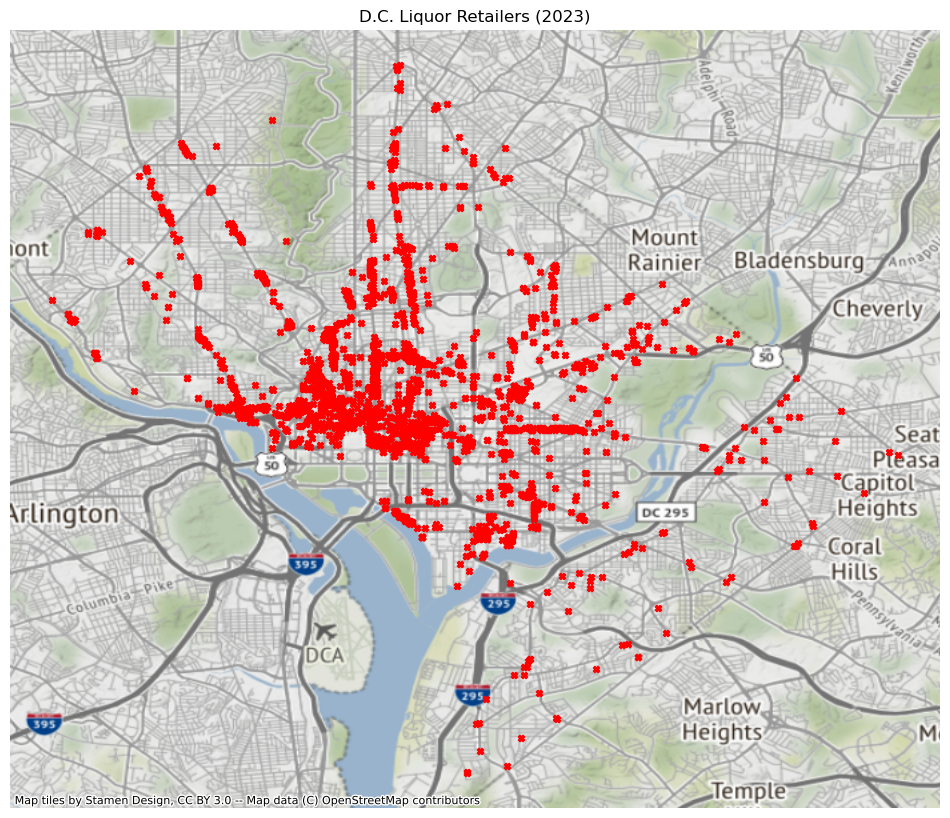

In [241]:
# start plot
fig, ax = plt.subplots(figsize=(12,12))
# details
liquor_location.plot(ax=ax,
                     marker='X',
                     markersize=20,
                     color='red')
# turn off axes
ax.axis('off')
# title
ax.set_title('D.C. Liquor Retailers (2023)')
# add basemap
ctx.add_basemap(ax, crs=4326)

The three maps above show that there are many more liquor retailers than there are grocery stores and/or farmers markets in DC, but to also keep in mind that the liquor retailers include multiple types of industries and providers. Most of the liquor retailers are concentrated in central DC, whereas grocery stores and farmers markets are relatively spread out, with fewer counts in the southeast areas.

My biggest takeaways from generating these charts and maps are that:

* There are many more liquor retailers than farmers markets or grocery stores across DC, but that is likely attributed to the fact that DC's liquor retailers cover a broader range of store types, industries, etc. At first glance, it would visually appear that DC has more "bad" food resources than "good" food resources.
* When looking at liquor retailers specifically, there is greater liquor access in Wards 2 and 3 compared to Wards 7 and 8. However, the diversity of liquor retailers is much greater in Wards 2 and 3 (which are also higher-income wards) whereas the concentration of liquor stores specifically is much higher in Ward 8 (which is also a majority Black, lower-income ward).
* When looking at grocery stores specifically, there is similarly, greater grocery access in Wards 2 and 3 compared to Wards 7 and 8. There are also distinct differences by race and income, which I presume plays a role in resource allocation and distribution.
* Finally, it is important to look at different spatial scales to get a more nuanced understanding of need. In the grocery store charts, there were differences in allocation when looking at wards compared to zip codes. When thinking of policies and solutions that address food access needs, it will be important to look at multiple spatial scales to better determine who and where greatest need and opportunity are.

**Contribution to Group Project**

As a group, we attempted to visualize and understand what the food access landscape looks like in Washington DC and take a deeper dive at the relationship between census demographic data and grocery store locations. My contribution to this midterm project was to create a series of charts and maps that help us understand what a baseline looks like of the existing food environment conditions. While I did not focus on creating maps that highlight potential relationships between our census data and grocery stores, I hope that this notebook can help give us a better sense of what the food environment looks like both more broadly across Washington D.C., and at multiple types of spatial scales (wards and zip codes).